In [217]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
    using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding, CairoMakie, JLD2
    include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
    include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");
else
    username = "nova"
    pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding, CairoMakie, JLD2
    include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
    include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")
end

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


plot_3d_2c_fp (generic function with 1 method)

In [218]:
tstart = 0.0; tend = 6000; tspan = (tstart, tend); tstep = 0.01;
alg = Vern9(); adapt = true; tol = 1e-12; abstol = tol; reltol = 1e-12;

In [219]:
# Эти начальные условия соответствуют одному и тому же аттрактору
u01 = [2.422092651924434, 0.8446031114662503, 0.6534291088738378, 0.09540062161211987, 0.0004056327238809937, 1.4805608752412292e-9];
u02 = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];

In [220]:
u01 = @SVector [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];
u02 = @SVector zeros(6);
param = TM6_glial_ECM_get_params();

In [221]:
valuewithname, indexparams = TM6_glial_ECM_help(param);

In [222]:
ds1 = ODEProblem(TM6_glial_ECM, u01, tspan, param);
ds2 = ODEProblem(TM6_glial_ECM, u02, tspan, param);
ds = CoupledODEs(TM6_glial_ECM, zeros(6), param, diffeq = (alg = alg, adaptive = adapt, abstol = abstol, reltol = reltol));

In [223]:
sol1 = solve(ds1, alg, adaptive = adapt, abstol = abstol, reltol = reltol, saveat = tstep);
sol2 = solve(ds2, alg, adaptive = adapt, abstol = abstol, reltol = reltol, saveat = tstep);

In [224]:
#=ds1 = CoupledODEs(TM6_glial_ECM, u01, param, diffeq = integ_set);
tr1, trange1 = trajectory(ds1, time, Ttr = ttr, Δt = tstep);

ds2 = CoupledODEs(TM6_glial_ECM, u02, param, diffeq = integ_set);
tr2, trange2 = trajectory(ds2, time, Ttr = ttr,  Δt = tstep);=#

In [225]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 0.1), interval(-1.0, 0.1);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-14, method = IntervalRootFinding.Krawczyk); fp

6-dimensional StateSpaceSet{Float64} with 3 points
 2.98076   0.780101  0.630456  0.0656946     3.24033e-65  -6.03582e-123
 0.944945  0.924509  0.576087  0.488924     -2.04588e-68  -9.70215e-83
 8.87461   0.48152   0.808868  0.000182715   3.75859e-48   1.78122e-149

In [226]:
cd("images")

Base.IOError: IOError: cd("images"): no such file or directory (ENOENT)

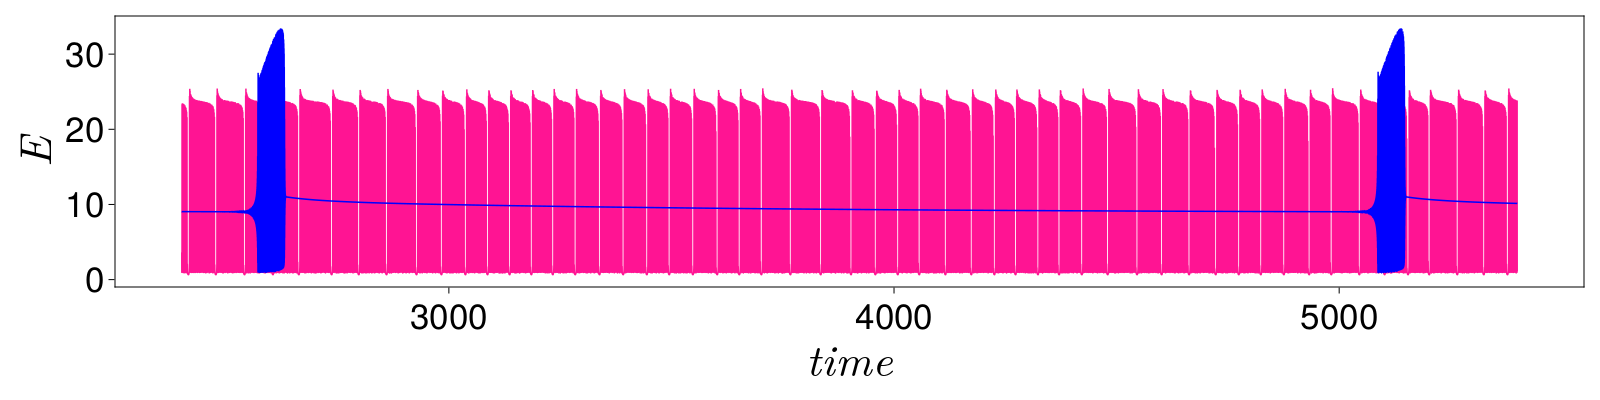

CairoMakie.Screen{EPS}


In [227]:
plt_start = 240000; plt_end = 540000;

width_ = 1600; height_ = 400;
xlab = L"time"; ylab = L"E";
xlabsize = 45; ylabsize = 45;
ticksize = 35;
gridvisible = false;
lw = 1.5;
color1 = :deeppink;
color2 = :blue;

f = Figure(resolution = (width_, height_))
ax = Axis(f[1, 1],
xlabel = xlab, ylabel = ylab, xlabelsize = xlabsize, ylabelsize = ylabsize,
xticklabelsize = ticksize, yticklabelsize = ticksize,
xgridvisible = gridvisible, ygridvisible = gridvisible);

lines!(sol1.t[plt_start:plt_end], sol1[1, plt_start:plt_end], linewidth = lw, color = color1);
lines!(sol2.t[plt_start:plt_end], sol2[1, plt_start:plt_end], linewidth = lw, color = color2);

display(f)

save("timeseries_two_attractor.eps", f)

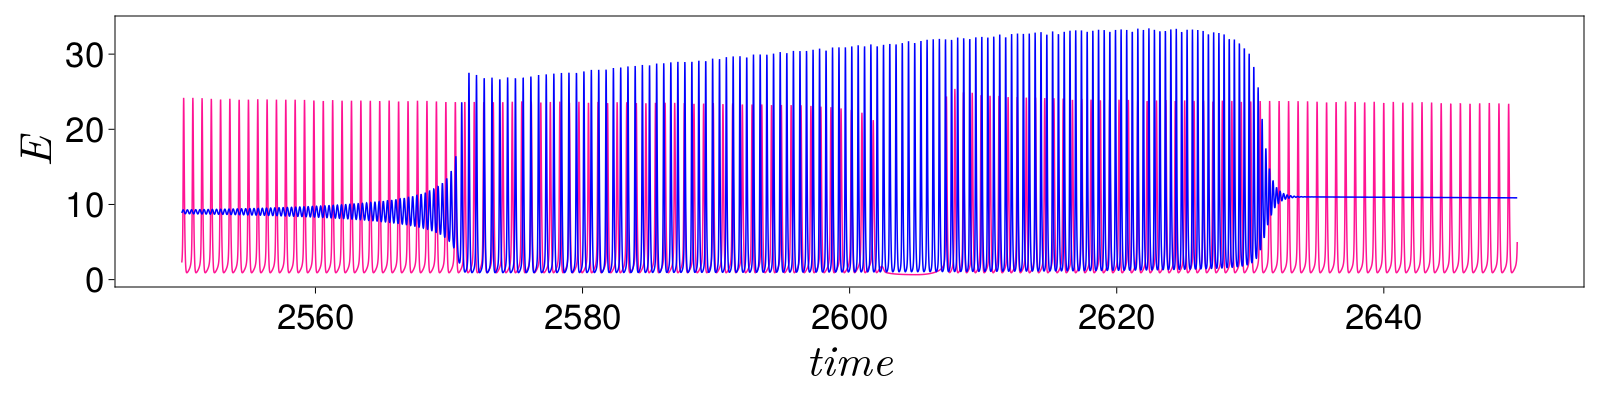

CairoMakie.Screen{EPS}


In [228]:
plt_start = 255000; plt_end = 265000;

width_ = 1600; height_ = 400;
xlab = L"time"; ylab = L"E";
xlabsize = 45; ylabsize = 45;
ticksize = 35;
gridvisible = false;
lw = 1.5;
color1 = :deeppink;
color2 = :blue;

f = Figure(resolution = (width_, height_))
ax = Axis(f[1, 1],
xlabel = xlab, ylabel = ylab, xlabelsize = xlabsize, ylabelsize = ylabsize,
xticklabelsize = ticksize, yticklabelsize = ticksize,
xgridvisible = gridvisible, ygridvisible = gridvisible);

lines!(sol1.t[plt_start:plt_end], sol1[1, plt_start:plt_end], linewidth = lw, color = color1);
lines!(sol2.t[plt_start:plt_end], sol2[1, plt_start:plt_end], linewidth = lw, color = color2);

display(f)

save("timeseries_two_attractor_zoom.eps", f)

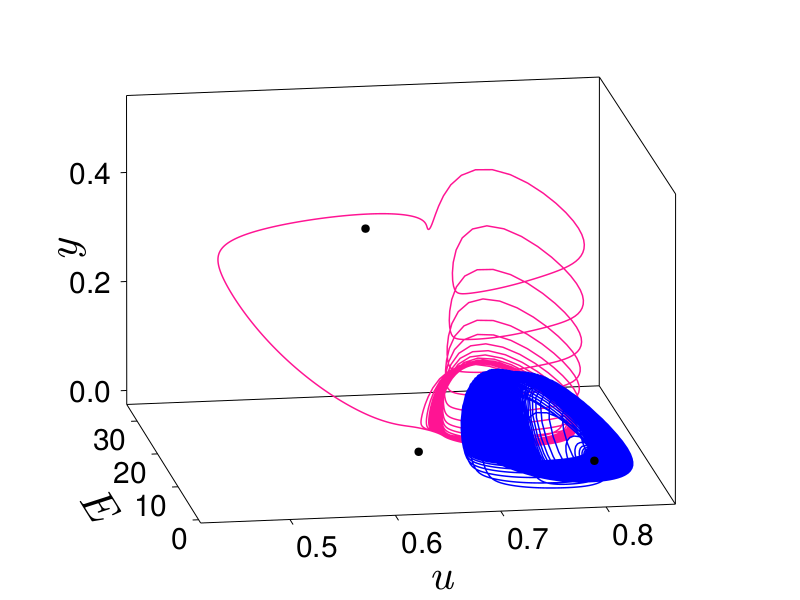

CairoMakie.Screen{EPS}


In [229]:
plt_start = 255000; plt_end = 265000;

index_x, index_y, index_z = 3, 1, 4;

width_ = 800; height_ = 600;
xlab = L"u"; ylab = L"E"; zlab = L"y";
xlbsize = 45; ylbsize=  45; zlbsize = 45;
ticksize = 30;
azim = -0.55pi; elev = 0.08pi;
gridvisible = false;
prot = 60;
disx = 40; disy = 55; disz = 40;
mksize = 10;
color1 = :deeppink;
color2 = :blue;
colordot = :black

f = Figure(resolution = (width_, height_));
ax = Axis3(f[1, 1], azimuth = azim, elevation = elev,
                xlabel = xlab, ylabel = ylab, zlabel = zlab,
                xlabelsize = xlbsize, ylabelsize = ylbsize, zlabelsize = zlbsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
                xgridvisible = gridvisible, ygridvisible = gridvisible, zgridvisible = gridvisible,
                protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

lines!(ax, sol1[index_x,  plt_start:plt_end], sol1[index_y,   plt_start:plt_end], sol1[index_z,   plt_start:plt_end], color = color1)
lines!(ax, sol2[index_x,  plt_start:plt_end], sol2[index_y,   plt_start:plt_end], sol2[index_z,   plt_start:plt_end], color = color2)

for fp_ in fp
    scatter!(ax, fp_[index_x], fp_[index_y], fp_[index_z], markerksize = mksize, color = colordot);
end
display(f)

save("phase_port_two_attractor.eps", f)

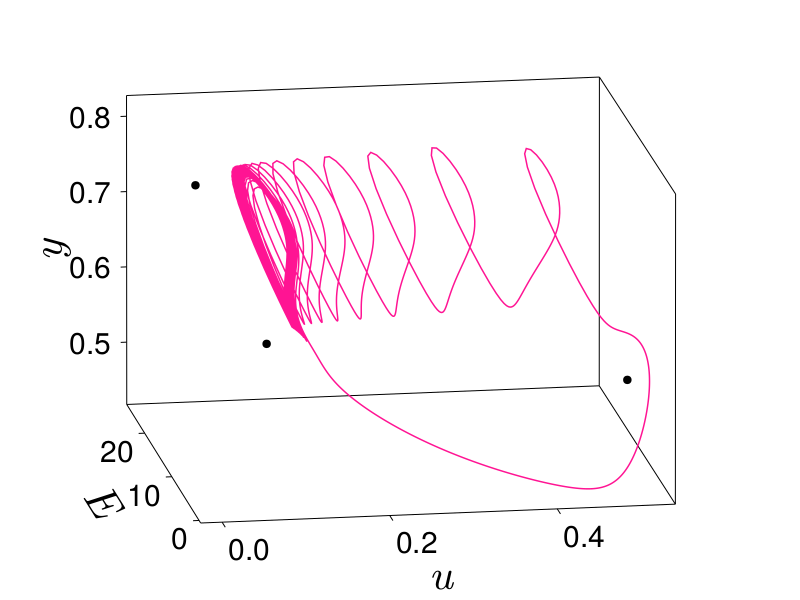

CairoMakie.Screen{EPS}


In [230]:
plt_start = 255000; plt_end = 265000;

index_x, index_y, index_z = 4, 1, 3;

width_ = 800; height_ = 600;
xlab = L"u"; ylab = L"E"; zlab = L"y";
xlbsize = 45; ylbsize=  45; zlbsize = 45;
ticksize = 30;
azim = -0.55pi; elev = 0.08pi;
gridvisible = false;
prot = 60;
disx = 40; disy = 50; disz = 55;
mksize = 10;
color1 = :deeppink;
color2 = :blue;
colordot = :black

f = Figure(resolution = (width_, height_));
ax = Axis3(f[1, 1], azimuth = azim, elevation = elev,
                xlabel = xlab, ylabel = ylab, zlabel = zlab,
                xlabelsize = xlbsize, ylabelsize = ylbsize, zlabelsize = zlbsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
                xgridvisible = gridvisible, ygridvisible = gridvisible, zgridvisible = gridvisible,
                protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

lines!(ax, sol1[index_x,  plt_start:plt_end], sol1[index_y,   plt_start:plt_end], sol1[index_z,   plt_start:plt_end], color = color1)

for fp_ in fp
    scatter!(ax, fp_[index_x], fp_[index_y], fp_[index_z], markerksize = mksize, color = colordot);
end
display(f)

save("phase_port_blue_sky.eps", f)

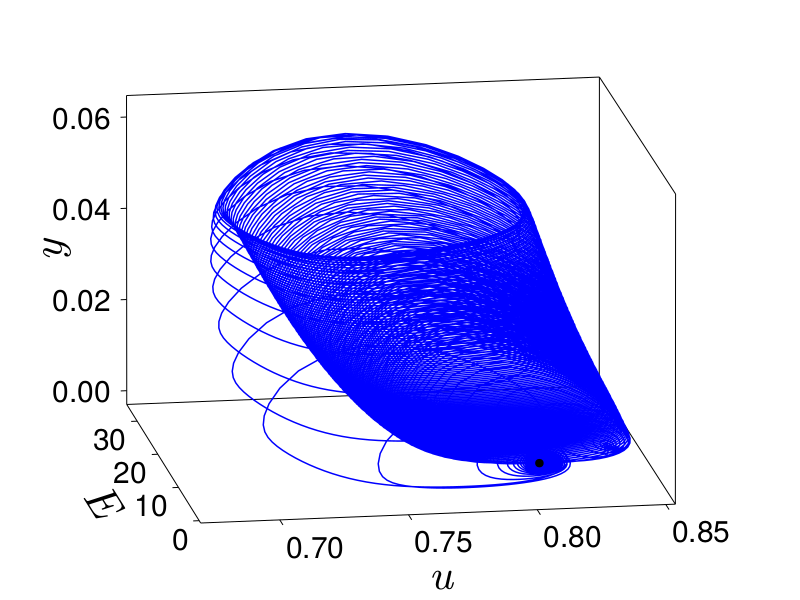

CairoMakie.Screen{EPS}


In [231]:
plt_start = 255000; plt_end = 265000;

index_x, index_y, index_z = 3, 1, 4;

width_ = 800; height_ = 600;
xlab = L"u"; ylab = L"E"; zlab = L"y";
xlbsize = 45; ylbsize=  45; zlbsize = 45;
ticksize = 30;
azim = -0.55pi; elev = 0.08pi;
gridvisible = false;
prot = 60;
disx = 40; disy = 50; disz = 55;
mksize = 10;
color1 = :deeppink;
color2 = :blue;
colordot = :black

f = Figure(resolution = (width_, height_));
ax = Axis3(f[1, 1], azimuth = azim, elevation = elev,
                xlabel = xlab, ylabel = ylab, zlabel = zlab,
                xlabelsize = xlbsize, ylabelsize = ylbsize, zlabelsize = zlbsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
                xgridvisible = gridvisible, ygridvisible = gridvisible, zgridvisible = gridvisible,
                protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz, zticks = [0.0, 0.02, 0.04, 0.06])

lines!(ax, sol2[index_x,  plt_start:plt_end], sol2[index_y,   plt_start:plt_end], sol2[index_z,   plt_start:plt_end], color = color2)

index_fp = 3;
scatter!(ax, fp[index_fp, index_x], fp[index_fp, index_y], fp[index_fp, index_z], markerksize = mksize, color = colordot);


display(f)

save("phase_port_hom.eps", f)